# CS4243 - Lab 10
Computer Vision & Pattern Recognition

Week 10

Author: Dr. Amirhassan MONAJEMI. Modified by: Soo Han

In [12]:
# Function estimation using neural network, libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot as plt
import math as m
import random as r
import pandas as pd

# Function Estimation Using ANNs

In this lab, you will learn how to estimate a function using Artificial Neural Networks using Keras. We will also test the effects of underfitting and overfitting the model to the function. 

## Part 1: Keras Installation

If you have not installed Keras in your machine, please install it now.

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. Keras is a high-level neural network Application Programming Interface (API) that runs on top of Tensorflow (or other libraries). 

In another words, Keras is an abstraction layer that builds up an underlying graphic model. TensorFlow is the engine that does all the heavy lifting and “runs” the model. To make our lab easier to understand for beginners in Deep Learning, we will use Keras which is better for quick understanding and implementation. For your project, however, feel free to use frameworks that you are most comfortable in.

In [7]:
# Keras 2 (tf.keras) is distributed along with the tensorflow package
# Run whichever that fits your system

# %pip install tensorflow
#  %pip install pandas

# conda install -c conda-forge tensorflow

## Part 2: Creating our training data.

To see how well ANN fits to a function, we define a true function and add some noise to simulate real world readings. Read through the code block to see how we generate this noisy sine signal. The values of (x,y) form a dataset for us to train our ANN afterwards. Given a trained ANN model, it should take in value of an unknown *x*, and give us a predicted value of *y*.

In [8]:
# define the function: noisy sine signal, 1d, defined between -10 and 10, step is 0.1
r.seed(0)
x = np.arange(-10,10,0.1)

# y = F(x)
#noisy version
y = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1) + 2*r.uniform(-1,1)   for i in x ])

#noise-less version
y_true = asarray([ 2.5*m.sin(0.4*m.pi*i + 1.12) + 1.3*m.sin(0.17*m.pi*i + 3.1)  for i in x ])

print(f'min and max (x axis)= ({x.min()}, {x.max()})')
print(f'min and max (y axis)= ({y.min()}, {y.max()})')

# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

min and max (x axis)= (-10.0, 9.899999999999928)
min and max (y axis)= (-5.476415979202004, 5.026224914647706)


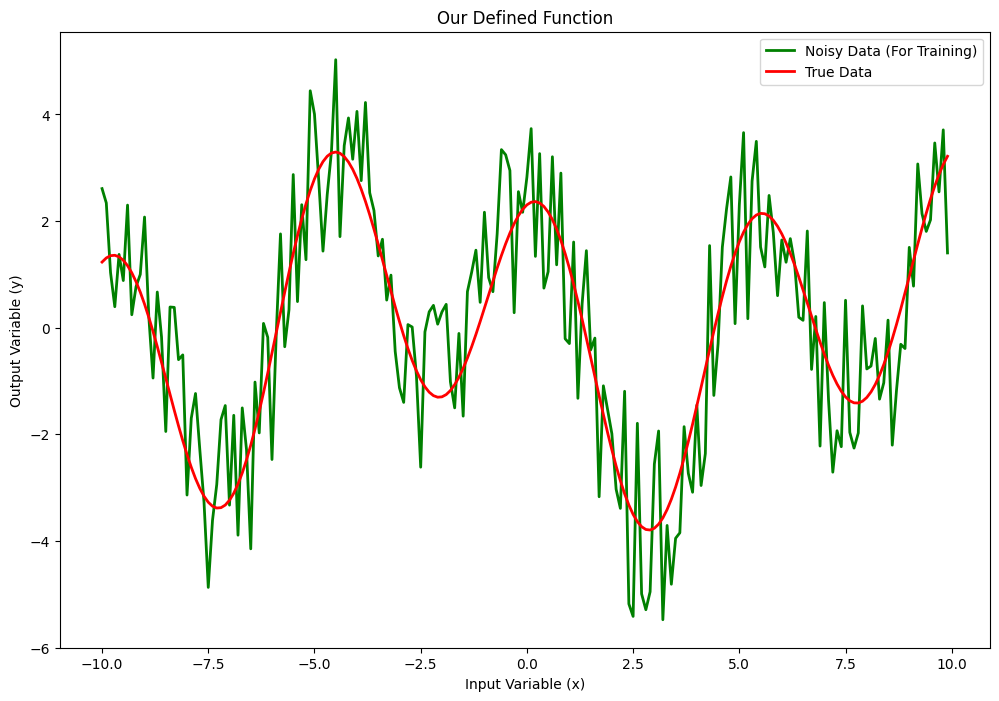

In [9]:
plt.figure(figsize= (12,8))
plt.plot(x, y, color='green', linewidth=2, label='Noisy Data (For Training)')
plt.plot(x, y_true, color='red', linewidth=2, label='True Data')
plt.title('Our Defined Function')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

## Part 3: Train ANN on our data

We initialize and train ANN using the following steps:
- Using `Sequential()`, we are able to group a linear stack of layers into a Model, which represents our ANN.
- `Dense()` is the Keras version of a Fully-Connected NN Layer. A Fully-Connected layer connects every input feature to every neuron in that layer. First arugment to Dense is units, which represents the dimensionality of the output space. For other arguments, we defined ReLU as our non-linear activation, and he_uniform initializer for our kernel weights.
- `Compile` method allows us to configure our ANN's learning process. We define the loss function to use Mean Squared Error, and use Adam Optimizer. This must be done before we start the training process.
- `Fit` method starts the training of our model. Key arguments here are the training data to be x, labels as y, epochs (number of iteration over the entire training data) to be 200, batch_size (defines the size of mini batch when slicing our data into smaller batches and feeding it into our model) to be 10.  
- `Predict` method gives the inference (prediction by the model) for the data provided to the model.

Read and understand the code below. Afterwards, observe the training and visualize the results.

In [10]:
# design the neural network model
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model.fit(x, y, epochs=200, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat = model.predict(x)

Epoch 1/200
20/20 [==============================] - 0s 538us/step - loss: 5.3206
Epoch 2/200
20/20 [==============================] - 0s 465us/step - loss: 5.1629
Epoch 3/200
20/20 [==============================] - 0s 448us/step - loss: 5.1400
Epoch 4/200
20/20 [==============================] - 0s 457us/step - loss: 5.1310
Epoch 5/200
20/20 [==============================] - 0s 407us/step - loss: 5.1186
Epoch 6/200
20/20 [==============================] - 0s 395us/step - loss: 5.1305
Epoch 7/200
20/20 [==============================] - 0s 409us/step - loss: 5.1144
Epoch 8/200
20/20 [==============================] - 0s 376us/step - loss: 5.0934
Epoch 9/200
20/20 [==============================] - 0s 378us/step - loss: 5.0719
Epoch 10/200
20/20 [==============================] - 0s 384us/step - loss: 5.0603
Epoch 11/200
20/20 [==============================] - 0s 391us/step - loss: 5.1492
Epoch 12/200
20/20 [==============================] - 0s 384us/step - loss: 5.0101
Epoch 13/200


MSE::: 3.754
Root MSE::: 1.937
MAE::: 1.576


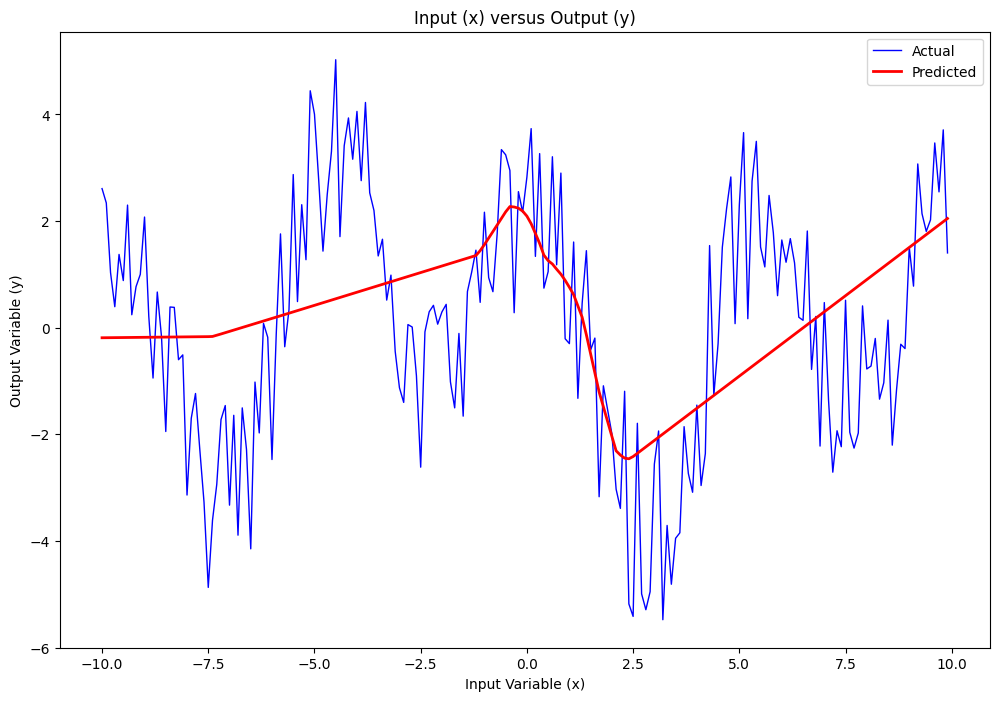

In [13]:
# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

2/2 [==============================] - 0s 1ms/step


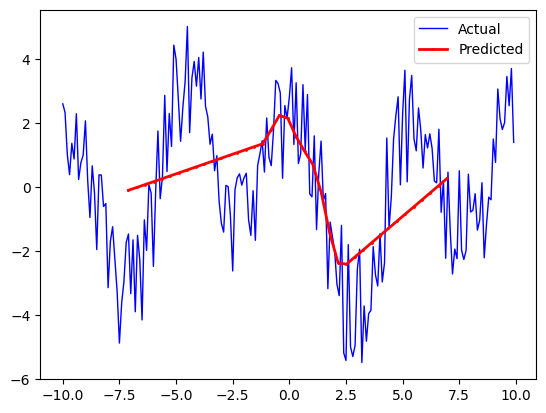

In [14]:
# now we change the input range and step to check
# the generality/interpolation of the model with respect to
# unseen data samples. 
xp = np.arange(-7.1, 7.1, 0.37)
M=xp.shape
xp = np.resize(xp,[ M[0],1 ])
yhatp = model.predict(xp)

plt.plot(x, y, color='blue', linewidth=1, label='Actual')
plt.plot(xp, yhatp, color='red', linewidth=2, label='Predicted' , marker='.' ,markersize=2)
plt.legend()
plt.show()

## Part 4: Improve our ANN's fit onto our data

In our code above, we defined an ANN model in the following configuration: 1xh1xh2xh3xh4x1 structure, with 4 hidden layers (Fully Connected MLP)

```
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
```

By 1xh1xh2xh3xh4x1 structure, with units (remember the first argument for Dense layer) `5,15,5,15,1` ,  you can understand this as follows, in order:
- 1: input dimension of our training data `x` is 1  
- h1: represents the first hidden layer, where the input dimension is 1, and output dimension is 5 
    - (meaning that a datapoint of size [Batch_Size, 1] goes into the layer, comes out as [Batch_Size,5])
- h2: represents the second hidden layer, where the input dimension is 5, and output dimension is 15
- h3: represents the third hidden layer, where the input dimension is 15, and output dimension is 5
- h4: represents the fourth hidden layer, where the input dimension is 5, and output dimension is 15
- 1: represents the last Fully Connected layer, where the input dimension is 15, and output dimension is 1
    - (meaning that a datapoint of size [Batch_Size, 15] goes into the layer, comes out as [Batch_Size,1])
    

In Part 4, we will explore if other configuration of our ANN will result in a better estimation of our original function. Simpler models (with less layers, dimension size, etc) will result in underfitting, while more complex models (more layers, higher dimension size, more epochs) results in overfitting of data. 

We call this the generalization ability of our model : can your model generalize well from the training data to any data from the problem domain? This allows us to make predictions in the future on data the model has never seen. Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms. Underfitting refers to a model that can neither model the training data nor generalize to new data. Overfitting refers to a model that models the training data too well.Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.



#### Test different model configurations

To test the concept explained above, you will now test the following configurations by yourself (helper code given in this notebook is more than sufficient for you to try) :

- 1x1x1x1 , epochs=200, use relu activation function
- 1x15x15x1 , epochs=20, , use relu activation function
- 1x15x15x1 , epochs=200 , no activation function
- 1x15x15x1 , epochs=2000 , use relu activation function
- 1x50x50x50x50x1 , epochs = 30000 , use relu activation function

Set, Train, Evaluate, and see the results. **Think about how these different configurations result in the generalization ability of our ANN.**

*Attention: train and test with the same data!*

Epoch 1/200
20/20 [==============================] - 0s 486us/step - loss: 18.2116
Epoch 2/200
20/20 [==============================] - 0s 466us/step - loss: 16.3290
Epoch 3/200
20/20 [==============================] - 0s 403us/step - loss: 14.7418
Epoch 4/200
20/20 [==============================] - 0s 406us/step - loss: 13.4122
Epoch 5/200
20/20 [==============================] - 0s 398us/step - loss: 12.2787
Epoch 6/200
20/20 [==============================] - 0s 353us/step - loss: 11.2944
Epoch 7/200
20/20 [==============================] - 0s 412us/step - loss: 10.5194
Epoch 8/200
20/20 [==============================] - 0s 341us/step - loss: 9.8173
Epoch 9/200
20/20 [==============================] - 0s 410us/step - loss: 9.2065
Epoch 10/200
20/20 [==============================] - 0s 338us/step - loss: 8.7064
Epoch 11/200
20/20 [==============================] - 0s 512us/step - loss: 8.2829
Epoch 12/200
20/20 [==============================] - 0s 826us/step - loss: 7.8938
Epoch 

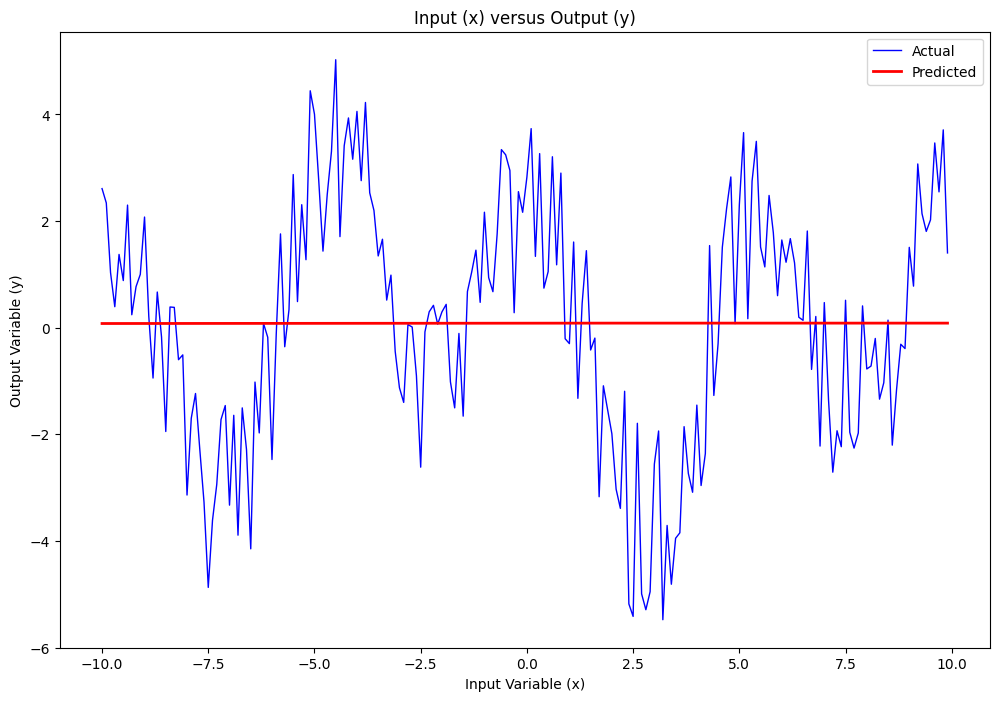

In [16]:
### Conduct your experiments below ###
# 1x1x1x1 configuration, epochs=200, relu activation function
# design the neural network model
model2 = Sequential()
model2.add(Dense(1, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='relu', kernel_initializer='he_uniform')) 
model2.add(Dense(1))

# define the loss function and optimization algorithm
model2.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model2.fit(x, y, epochs=200, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat2 = model2.predict(x)

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat2))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat2) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat2))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat2, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()
###
###

Epoch 1/20
20/20 [==============================] - 0s 522us/step - loss: 131.6435
Epoch 2/20
20/20 [==============================] - 0s 434us/step - loss: 82.2299
Epoch 3/20
20/20 [==============================] - 0s 436us/step - loss: 53.6798
Epoch 4/20
20/20 [==============================] - 0s 448us/step - loss: 35.7530
Epoch 5/20
20/20 [==============================] - 0s 401us/step - loss: 24.0593
Epoch 6/20
20/20 [==============================] - 0s 448us/step - loss: 16.1593
Epoch 7/20
20/20 [==============================] - 0s 388us/step - loss: 11.2958
Epoch 8/20
20/20 [==============================] - 0s 425us/step - loss: 8.3137
Epoch 9/20
20/20 [==============================] - 0s 412us/step - loss: 6.6524
Epoch 10/20
20/20 [==============================] - 0s 417us/step - loss: 5.9355
Epoch 11/20
20/20 [==============================] - 0s 394us/step - loss: 5.5013
Epoch 12/20
20/20 [==============================] - 0s 380us/step - loss: 5.3319
Epoch 13/20
20/20

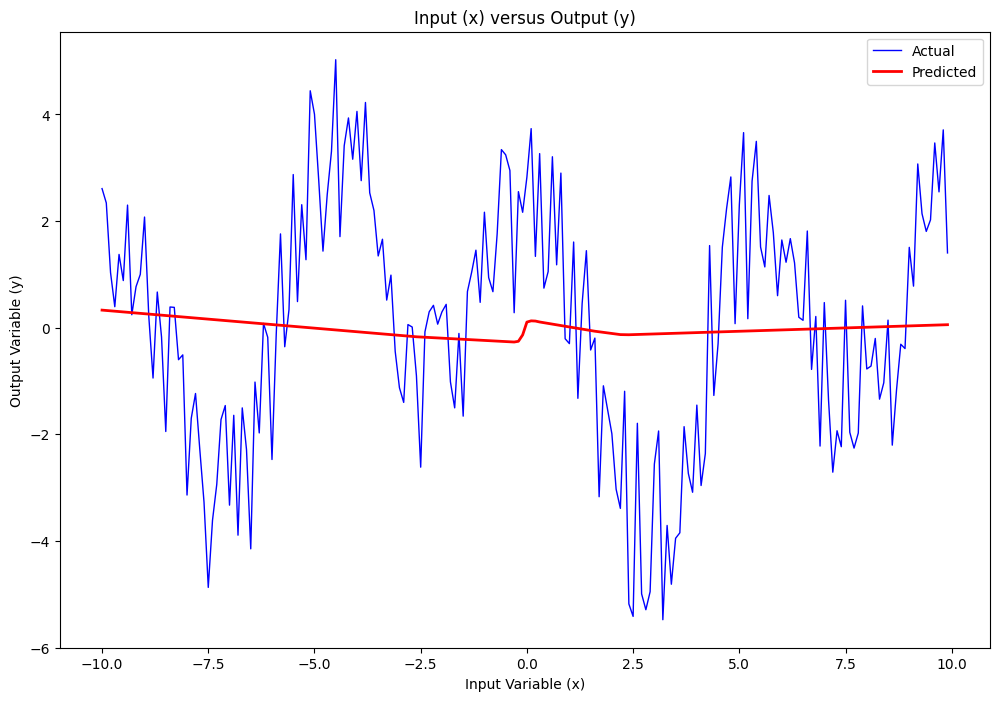

In [18]:
# 1x15x15x1 configuration, epochs=20, relu activation function
# design the neural network model
model3 = Sequential()
model3.add(Dense(15, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model3.add(Dense(1))

# define the loss function and optimization algorithm
model3.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model3.fit(x, y, epochs=20, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat3 = model3.predict(x)

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat3))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat3) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat3))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat3, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

Epoch 1/200
20/20 [==============================] - 0s 533us/step - loss: 5.2180
Epoch 2/200
20/20 [==============================] - 0s 429us/step - loss: 5.4122
Epoch 3/200
20/20 [==============================] - 0s 445us/step - loss: 5.2176
Epoch 4/200
20/20 [==============================] - 0s 411us/step - loss: 5.1972
Epoch 5/200
20/20 [==============================] - 0s 416us/step - loss: 5.2436
Epoch 6/200
20/20 [==============================] - 0s 453us/step - loss: 5.2408
Epoch 7/200
20/20 [==============================] - 0s 370us/step - loss: 5.2655
Epoch 8/200
20/20 [==============================] - 0s 423us/step - loss: 5.3417
Epoch 9/200
20/20 [==============================] - 0s 372us/step - loss: 5.3398
Epoch 10/200
20/20 [==============================] - 0s 418us/step - loss: 5.4434
Epoch 11/200
20/20 [==============================] - 0s 384us/step - loss: 5.1910
Epoch 12/200
20/20 [==============================] - 0s 420us/step - loss: 5.2786
Epoch 13/200


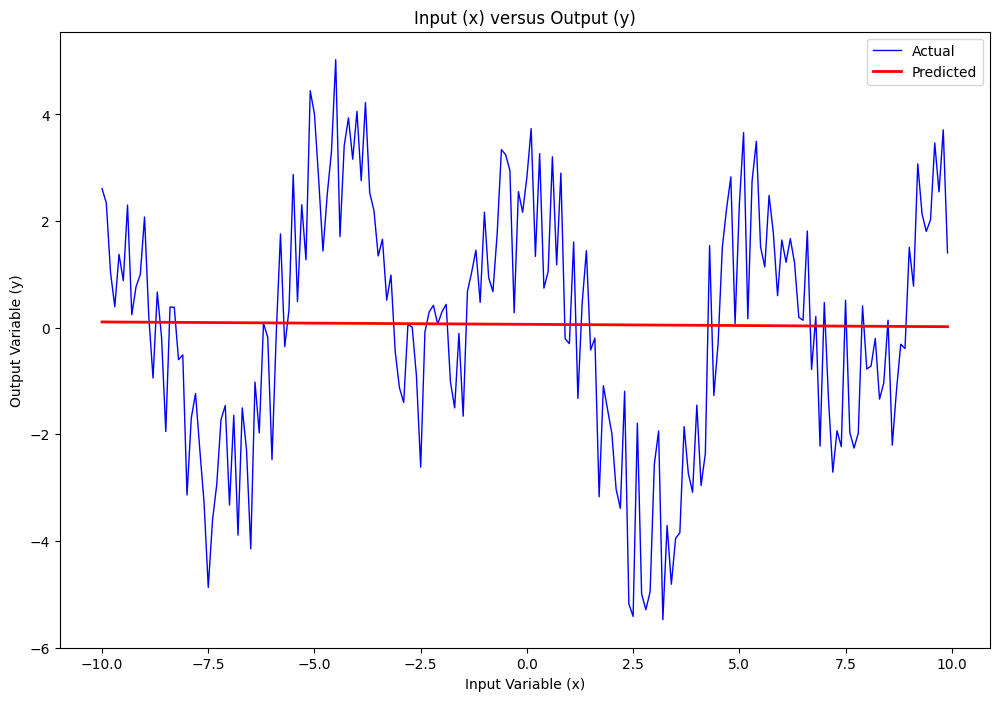

In [19]:
# 1x15x15x1 configuration, epochs=200, no activation function
# design the neural network model
model4 = Sequential()
model4.add(Dense(15, input_dim=1, kernel_initializer='he_uniform'))
model4.add(Dense(15, kernel_initializer='he_uniform')) 
model4.add(Dense(1))

# define the loss function and optimization algorithm
model4.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model4.fit(x, y, epochs=200, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat4 = model4.predict(x)

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat4))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat4) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat4))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat4, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

Epoch 1/2000
20/20 [==============================] - 0s 483us/step - loss: 67.7135
Epoch 2/2000
20/20 [==============================] - 0s 436us/step - loss: 42.4491
Epoch 3/2000
20/20 [==============================] - 0s 450us/step - loss: 26.8357
Epoch 4/2000
20/20 [==============================] - 0s 390us/step - loss: 18.5235
Epoch 5/2000
20/20 [==============================] - 0s 386us/step - loss: 13.0631
Epoch 6/2000
20/20 [==============================] - 0s 373us/step - loss: 9.9129
Epoch 7/2000
20/20 [==============================] - 0s 372us/step - loss: 7.9824
Epoch 8/2000
20/20 [==============================] - 0s 381us/step - loss: 6.7142
Epoch 9/2000
20/20 [==============================] - 0s 358us/step - loss: 6.0005
Epoch 10/2000
20/20 [==============================] - 0s 393us/step - loss: 5.5788
Epoch 11/2000
20/20 [==============================] - 0s 362us/step - loss: 5.3235
Epoch 12/2000
20/20 [==============================] - 0s 421us/step - loss: 5.1

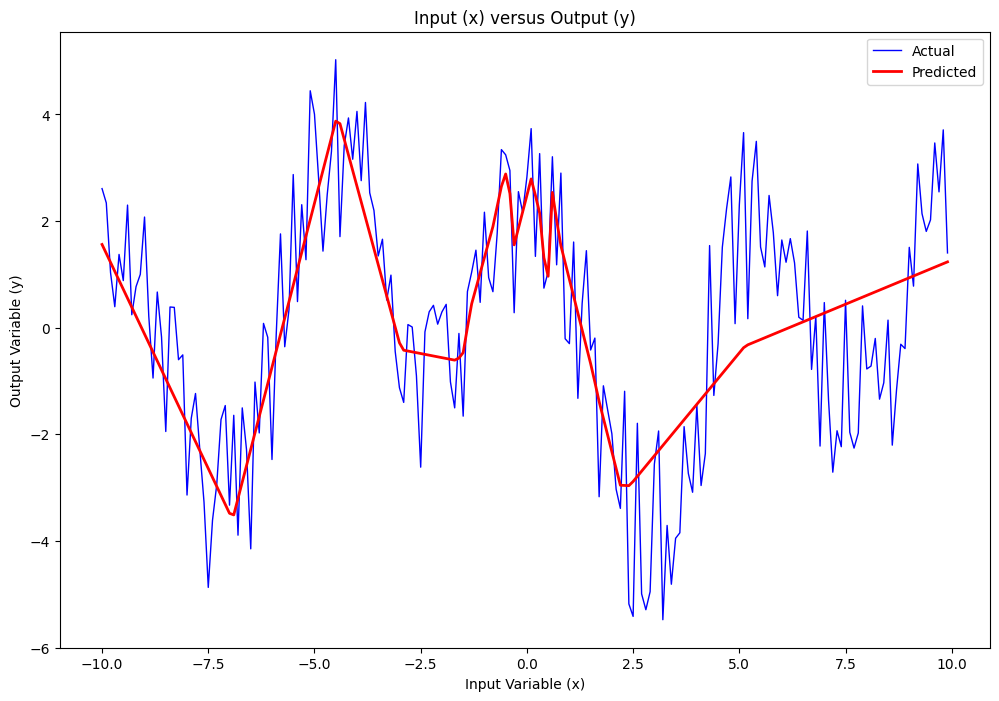

In [20]:
# 1x15x15x1 configuration, epochs=2000, relu activation function
# design the neural network model
model5 = Sequential()
model5.add(Dense(15, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model5.add(Dense(15, activation='relu', kernel_initializer='he_uniform')) 
model5.add(Dense(1))

# define the loss function and optimization algorithm
model5.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model5.fit(x, y, epochs=2000, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat5 = model5.predict(x)

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat5))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat5) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat5))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat5, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

Epoch 1/30000
20/20 [==============================] - 0s 565us/step - loss: 36.2134
Epoch 2/30000
20/20 [==============================] - 0s 496us/step - loss: 6.0788
Epoch 3/30000
20/20 [==============================] - 0s 437us/step - loss: 5.4225
Epoch 4/30000
20/20 [==============================] - 0s 478us/step - loss: 5.2522
Epoch 5/30000
20/20 [==============================] - 0s 472us/step - loss: 5.4008
Epoch 6/30000
20/20 [==============================] - 0s 471us/step - loss: 5.3361
Epoch 7/30000
20/20 [==============================] - 0s 474us/step - loss: 5.1934
Epoch 8/30000
20/20 [==============================] - 0s 494us/step - loss: 5.3887
Epoch 9/30000
20/20 [==============================] - 0s 479us/step - loss: 5.3890
Epoch 10/30000
20/20 [==============================] - 0s 500us/step - loss: 5.3242
Epoch 11/30000
20/20 [==============================] - 0s 457us/step - loss: 5.5206
Epoch 12/30000
20/20 [==============================] - 0s 487us/step - l

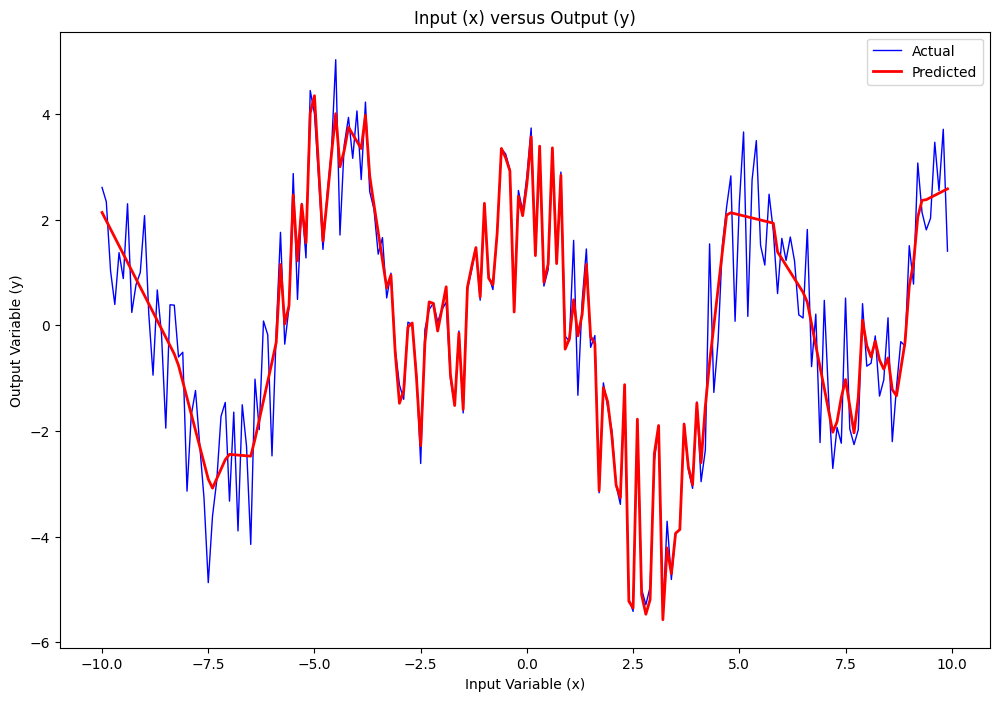

In [21]:
# 1x50x50x50x50x1 configuration, epochs=30000, relu activation function
# design the neural network model
model6 = Sequential()
model6.add(Dense(50, input_dim=1, activation='relu' , kernel_initializer='he_uniform'))
model6.add(Dense(50, activation='relu', kernel_initializer='he_uniform')) 
model6.add(Dense(50, activation='relu', kernel_initializer='he_uniform')) 
model6.add(Dense(50, activation='relu', kernel_initializer='he_uniform')) 
model6.add(Dense(1))

# define the loss function and optimization algorithm
model6.compile(loss='mse', optimizer='adam')

# fit/train the model on the training dataset
model6.fit(x, y, epochs=30000, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat6 = model6.predict(x)

# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat6))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat6) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat6))
plt.figure(figsize= (12,8))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')
# plot x vs yhat
plt.plot(x, yhat6, color='red', linewidth=2, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

Further questions:

- We did not use any normalization here, does it help to normalize the data?
> Yes, l2 regularisation would help to reduce overfitting
- What if we use sigmoid/logistic activations and not relu?
> ReLU is a piecewise linear function - causes decision boundary to have piecewise linear similarity while sigmoid is a smooth activation function, can cause decision boundary to have a smooth curve.
> ReLU can also achieve it, but need more neurons